In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
train = pd.read_csv("health care diabetes.csv")

In [3]:
train.head(n=20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Checking for the Non Available Numbers 

In [4]:
train.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Descriptive analysis of the data:

In [5]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visually exploring  the variables using Histogram:

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

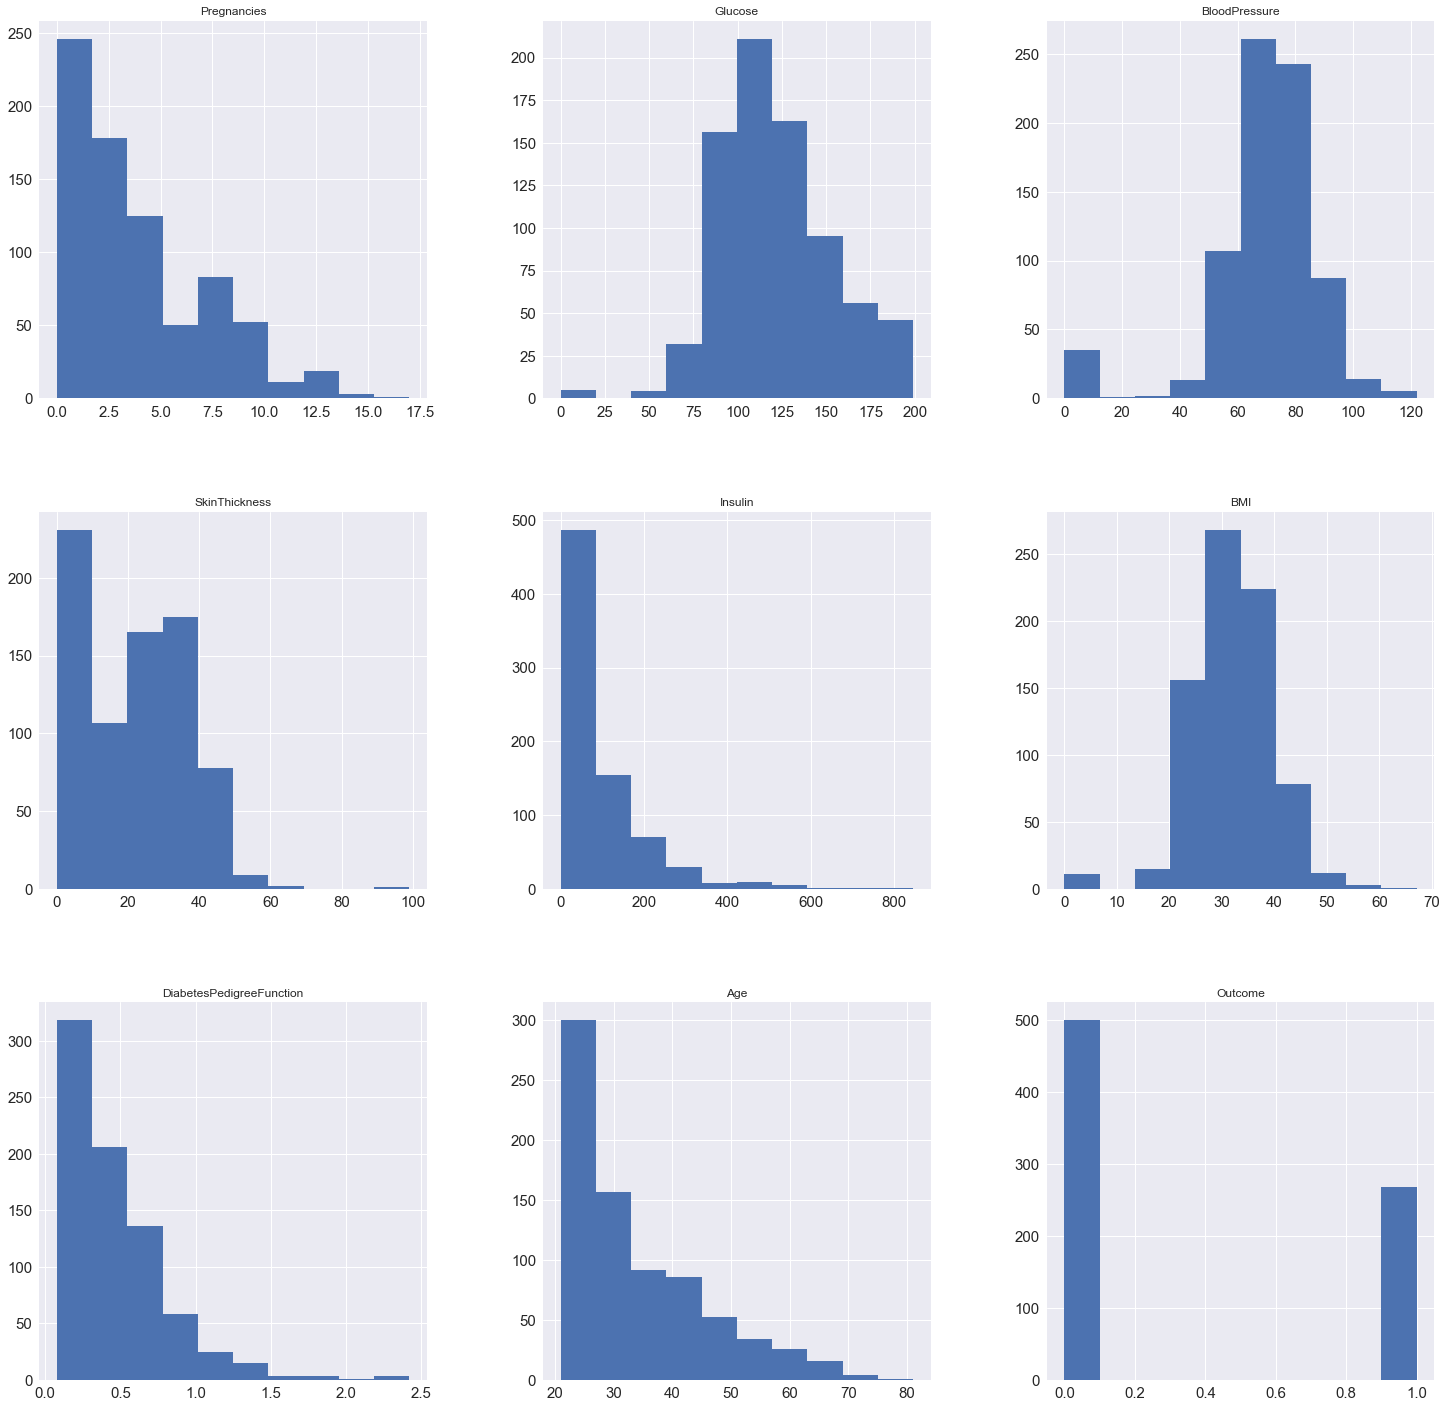

In [6]:
plt.style.use('seaborn')
train[train.columns].hist(figsize=(25,25), xlabelsize=15, ylabelsize=15)
#train.hist(figsize=(40,40), xlabelsize=30, ylabelsize=30)

### Checking for zeros as Missing Data

In [7]:
for i in ('Glucose','BloodPressure','SkinThickness','Insulin','BMI'):
    print (train[train[i]==0])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115              0              0        0  35.3   
15             7      100              0              0        0  30.0   
49             7      105              0              0  

### Checking for Outliers:

{'whiskers': [<matplotlib.lines.Line2D at 0x256d89ba790>,
 'caps': [<matplotlib.lines.Line2D at 0x256d89dc580>,
 'boxes': [<matplotlib.lines.Line2D at 0x256d89c9bb0>,
 'medians': [<matplotlib.lines.Line2D at 0x256d89dcca0>,
 'fliers': [<matplotlib.lines.Line2D at 0x256d89e9070>,
 'means': []}

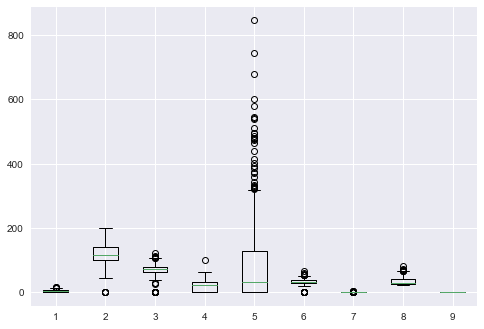

In [8]:
plt.boxplot(train )

#### Since, there are lots of outliers present here so we are replacing missing values with median value here.

In [9]:
for i in ('Glucose','BloodPressure','SkinThickness','Insulin','BMI'):
    print(train[train[i]!=0][i].median() )

117.0
72.0
29.0
125.0
32.3


### Replacing outliers with Median value

In [10]:
for i in ('Glucose','BloodPressure','SkinThickness','Insulin','BMI'):
    train[i].replace(to_replace= 0,value= train[train[i]!=0][i].median(),inplace= True)

### Checking for missing values of cleansed data:

In [11]:
for i in ('Glucose','BloodPressure','SkinThickness','Insulin','BMI'):
    print (train[train[i]==0])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


### Saving the cleaned data as a csv file for reporting purpose 

In [12]:
train.to_csv('file.csv')

### Checking for data types

In [13]:
train.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

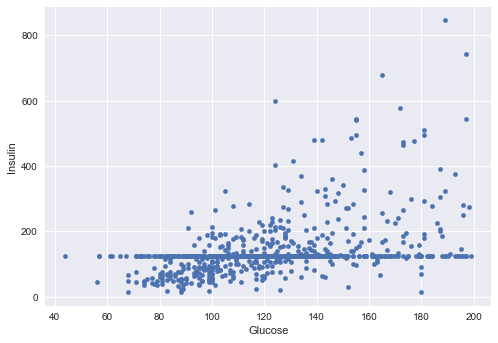

In [14]:
train.plot.scatter(x= 'Glucose', y= 'Insulin')

### Creating the Count Plot describing the data types and the count of variables. 

In [15]:
df_1 = pd.DataFrame(train.dtypes)

<AxesSubplot:>

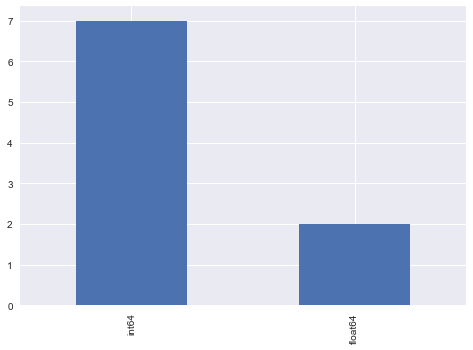

In [16]:
df_1[0].value_counts().plot(kind='bar')

### Checking the balance of the data:

In [17]:
train['Outcome'].value_counts(normalize= True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

### Plotting the count of outcomes by their value:

<AxesSubplot:>

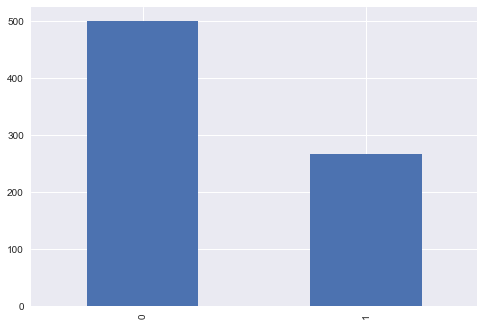

In [18]:
train['Outcome'].value_counts().plot(kind = 'bar')

### Create scatter charts between the pair of variables to understand the relationships:

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


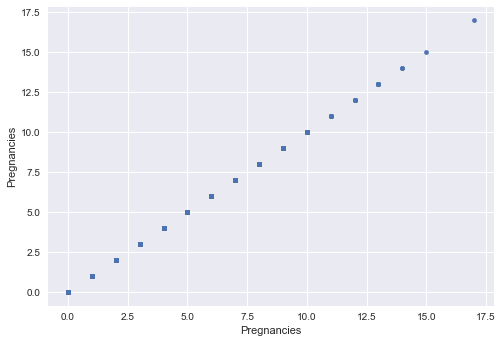

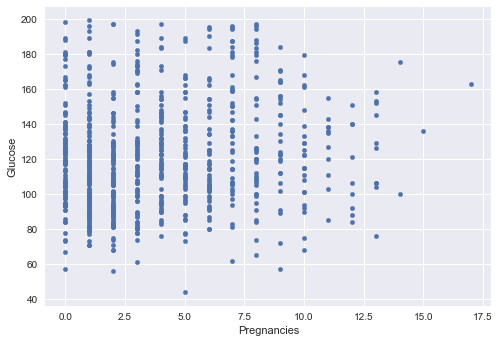

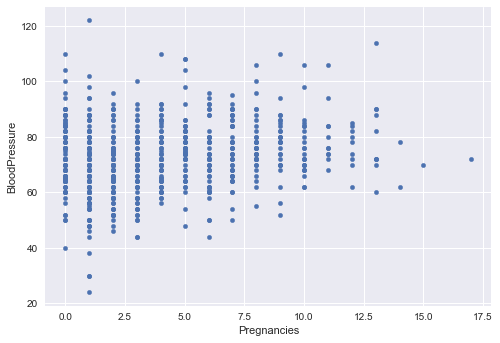

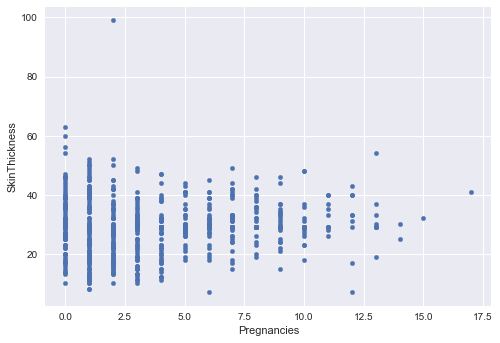

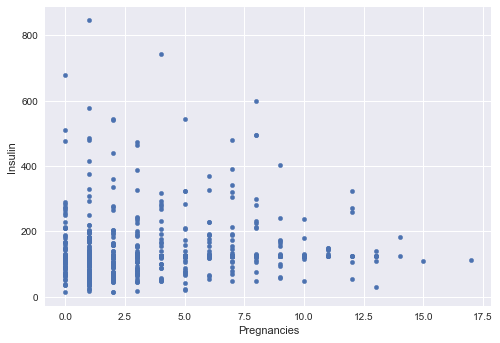

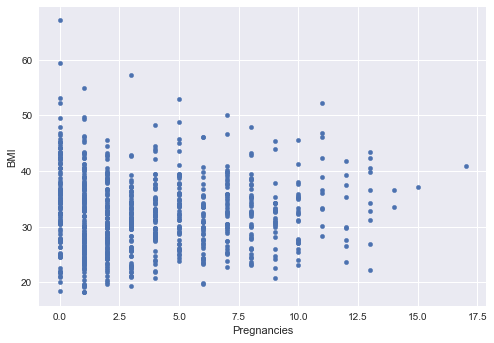

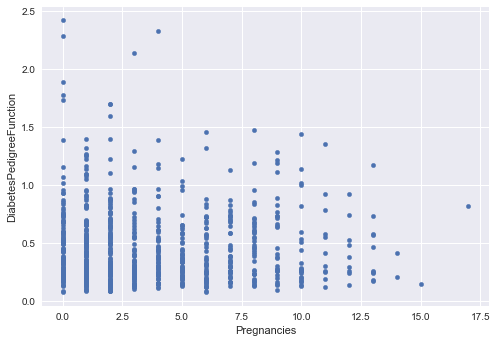

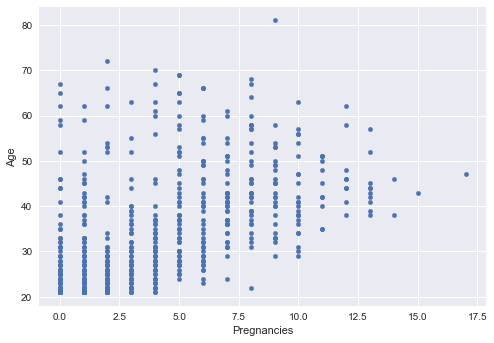

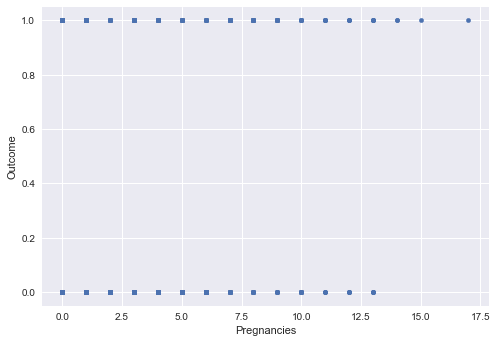

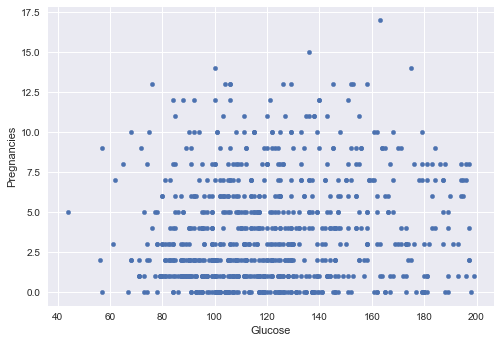

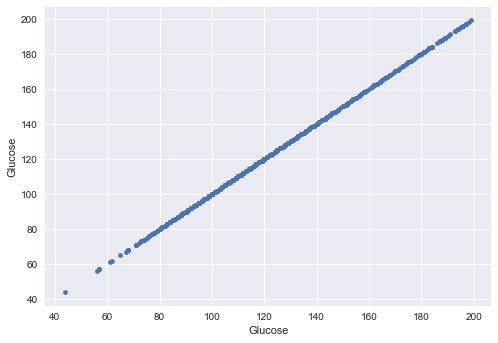

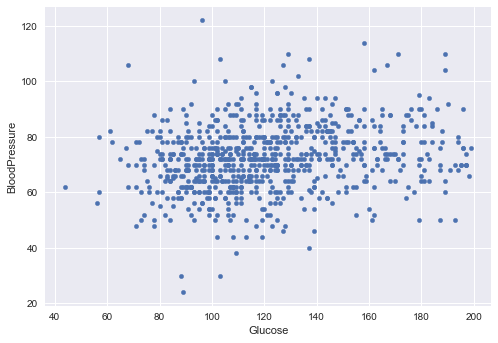

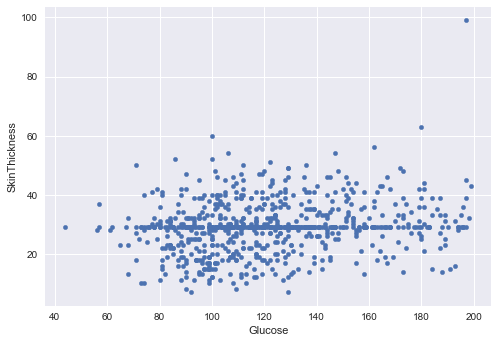

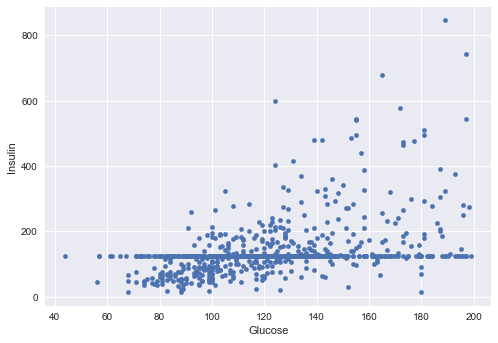

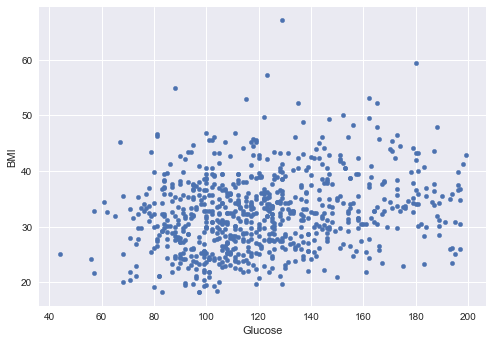

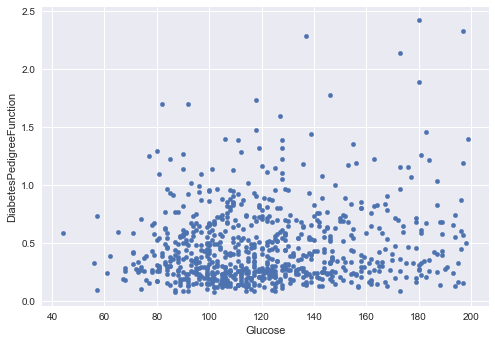

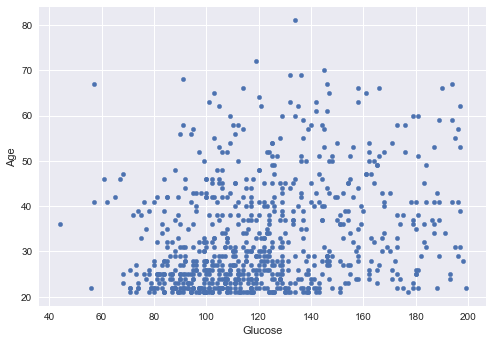

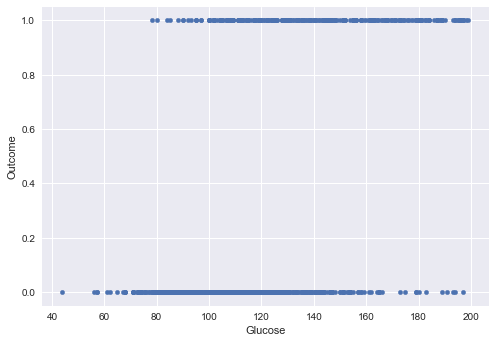

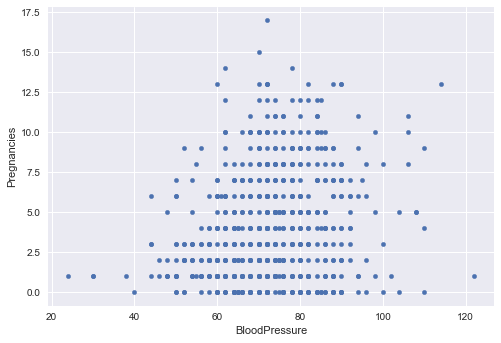

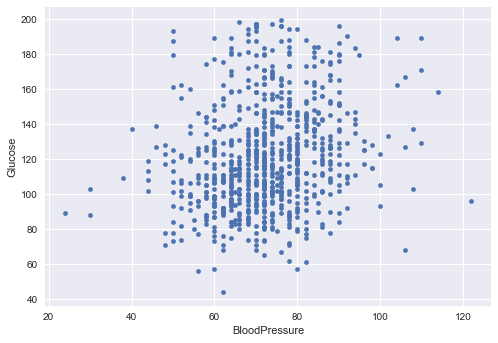

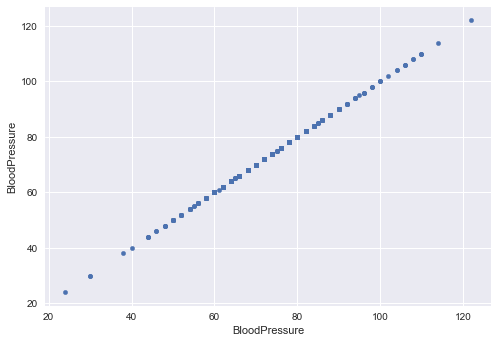

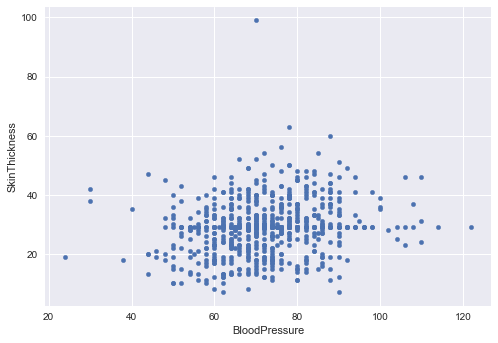

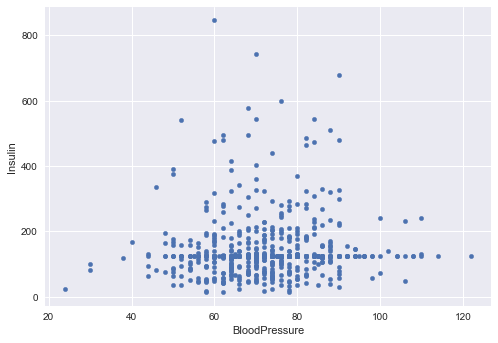

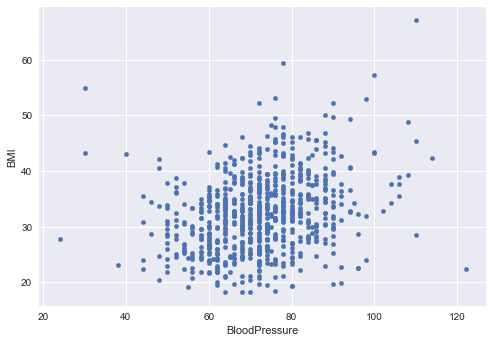

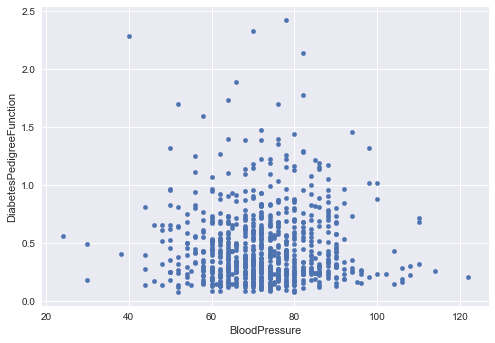

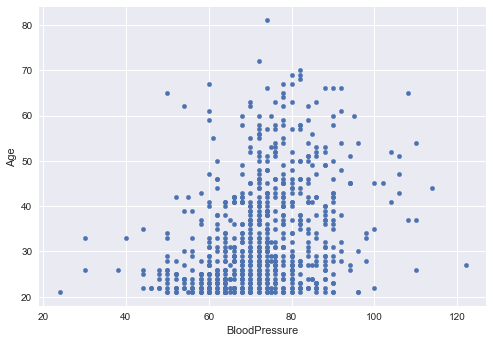

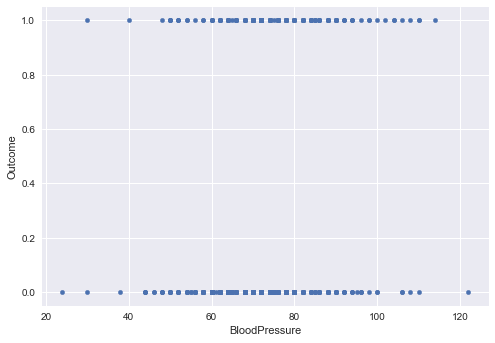

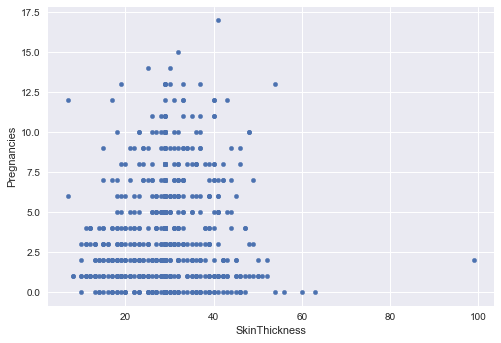

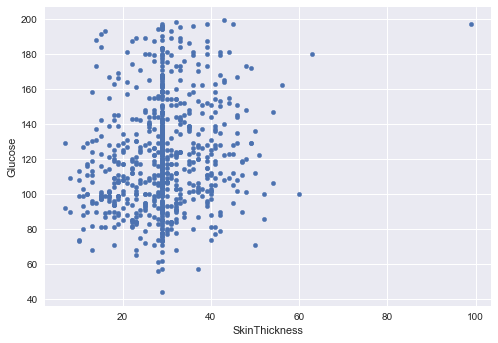

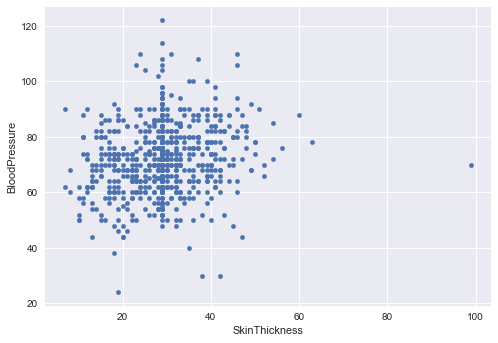

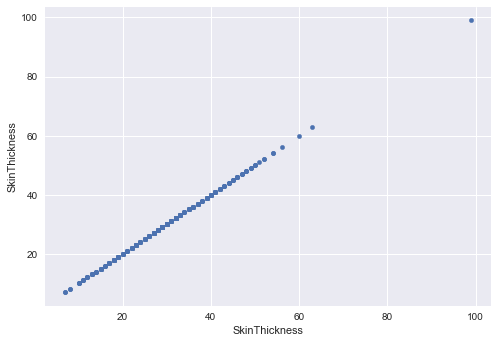

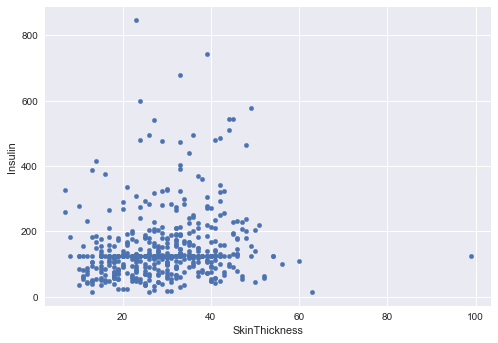

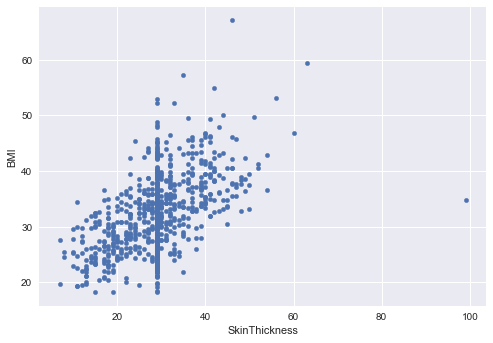

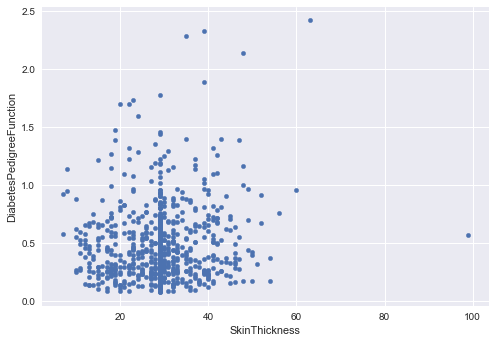

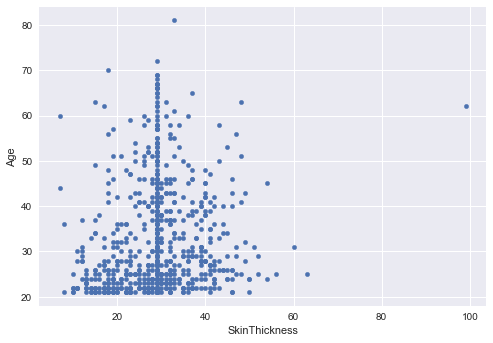

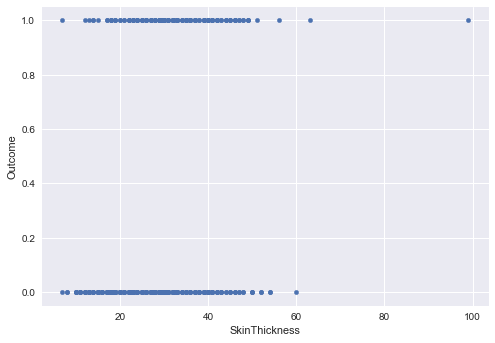

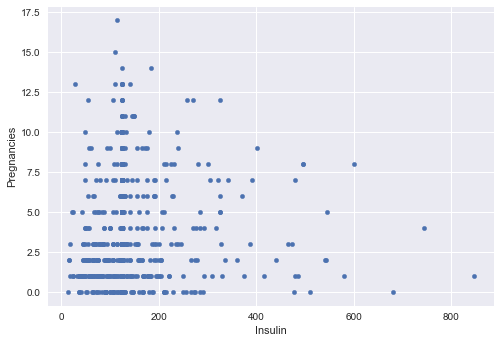

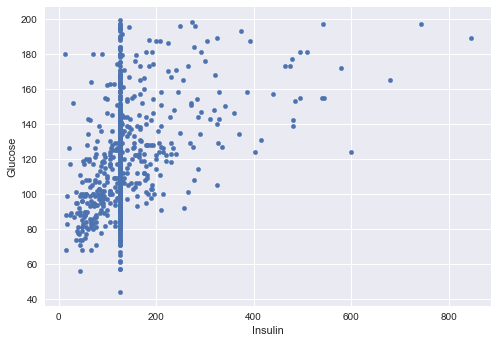

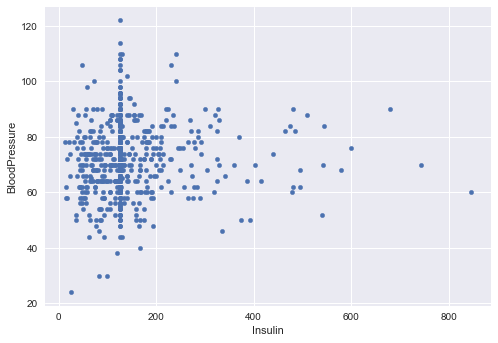

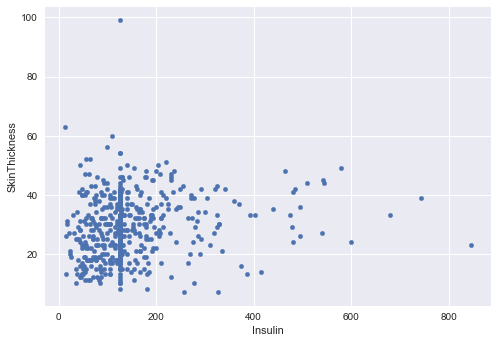

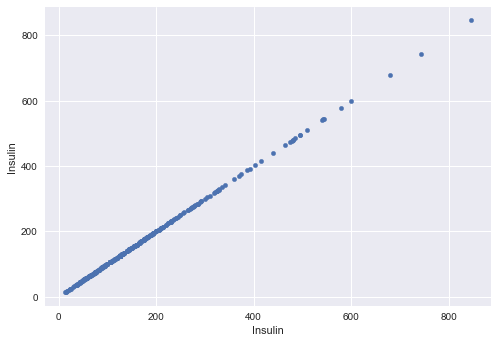

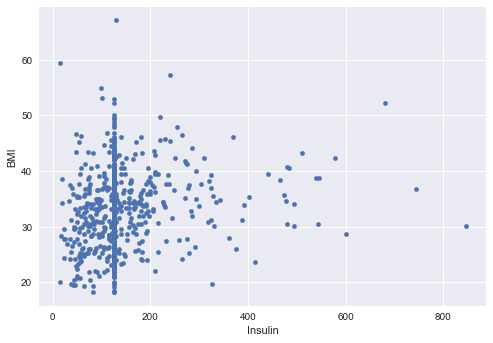

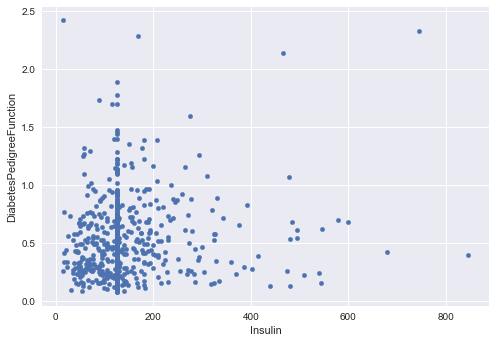

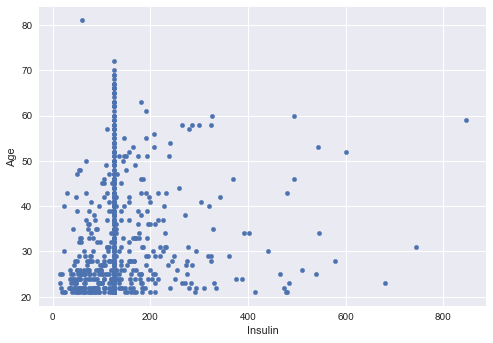

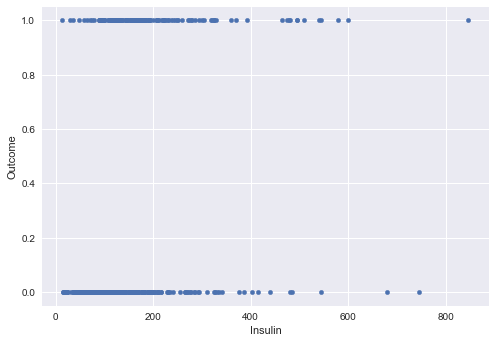

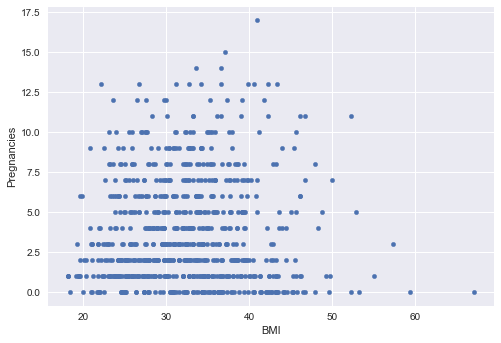

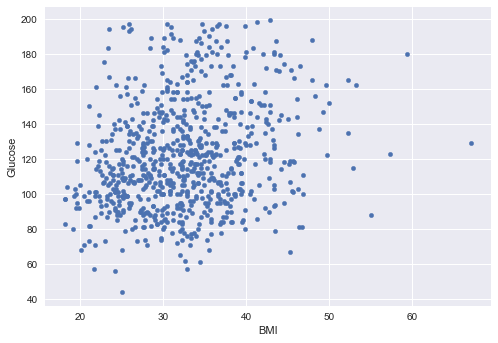

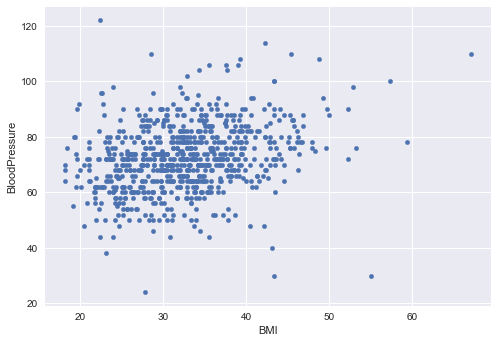

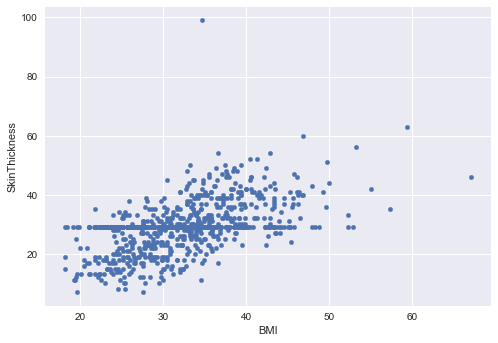

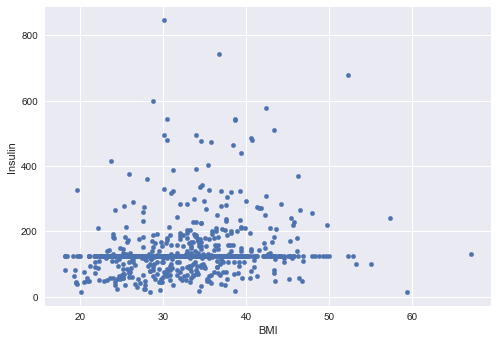

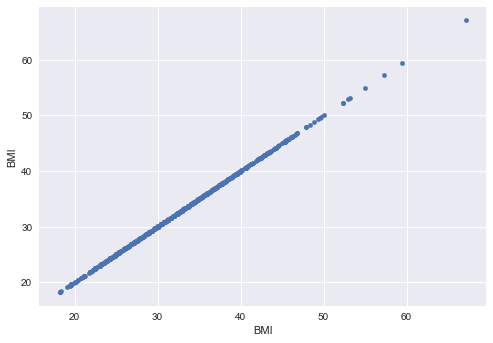

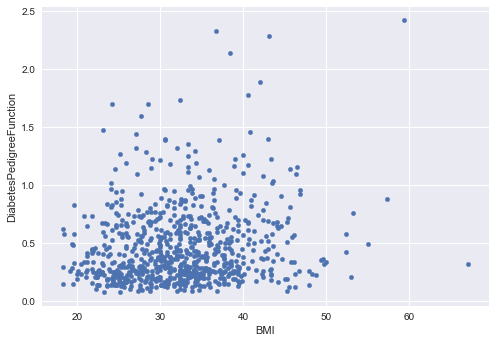

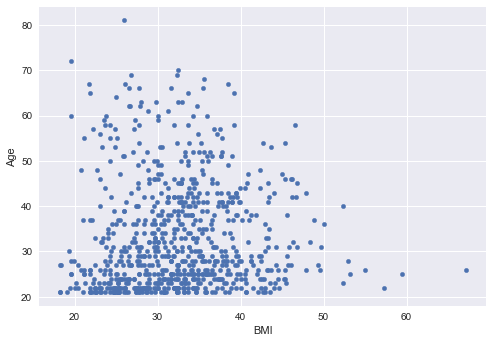

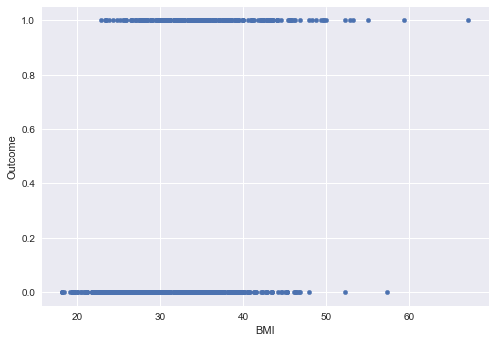

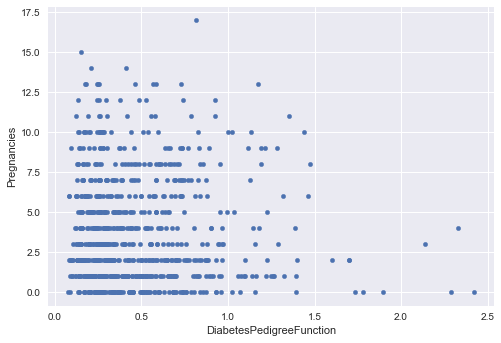

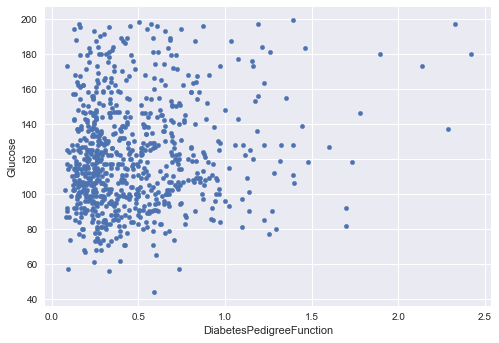

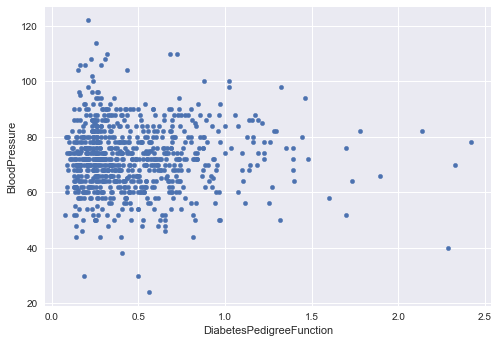

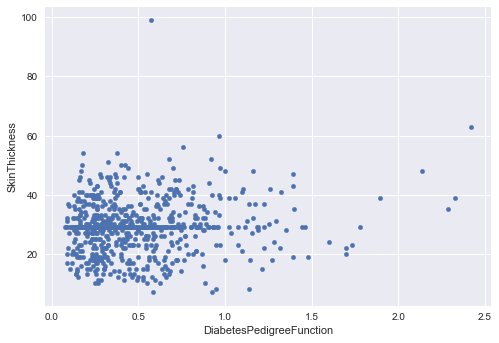

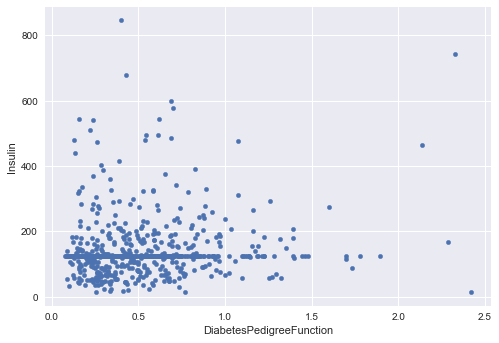

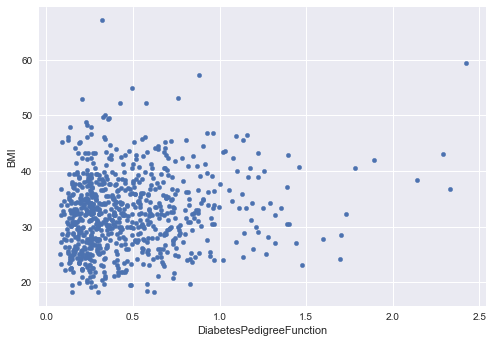

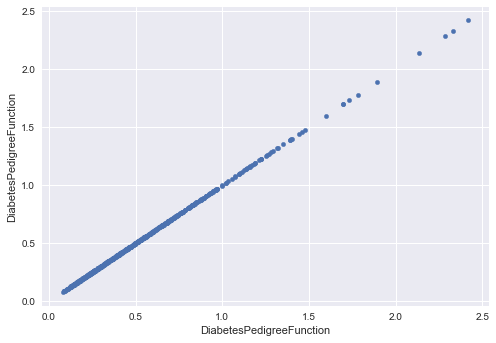

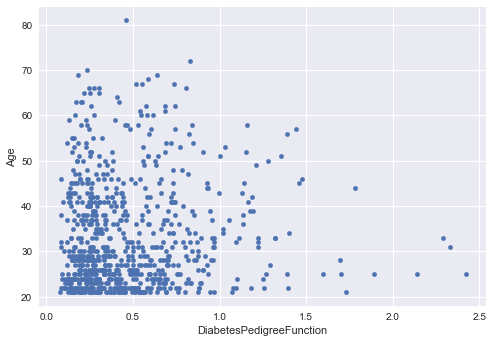

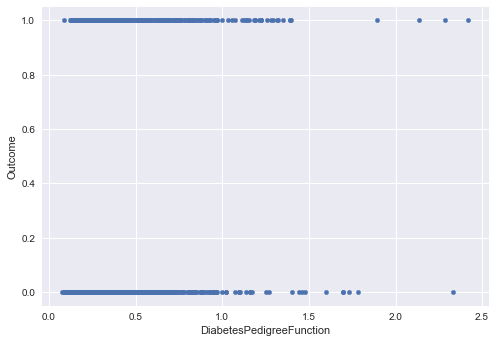

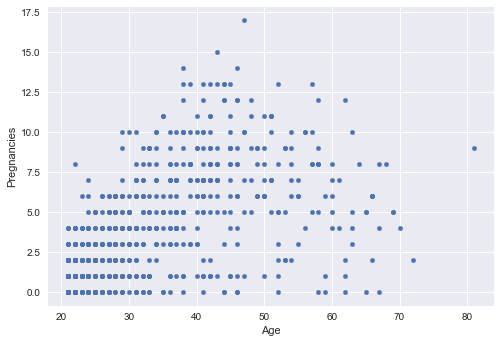

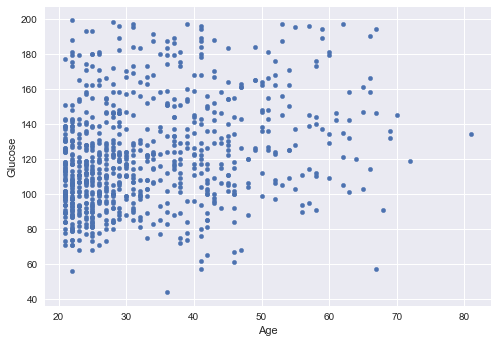

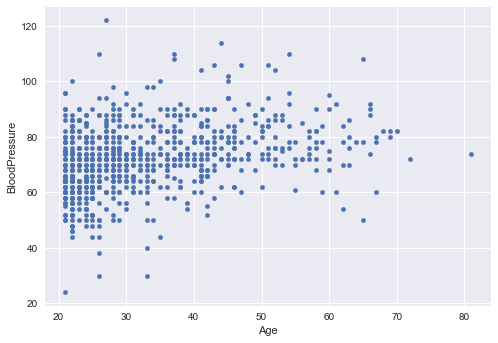

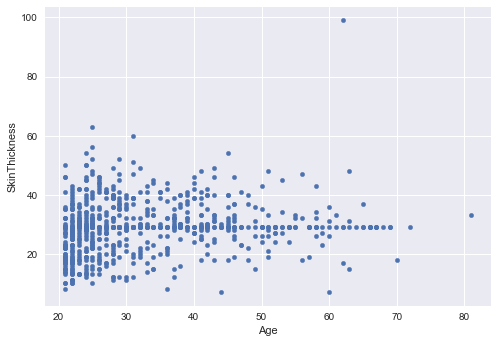

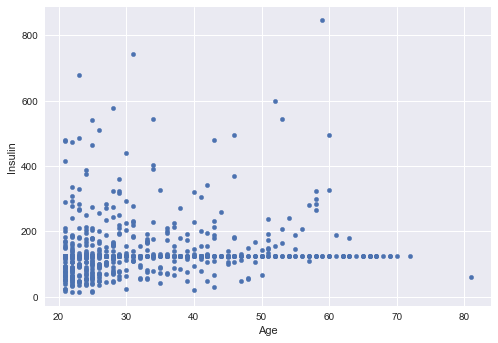

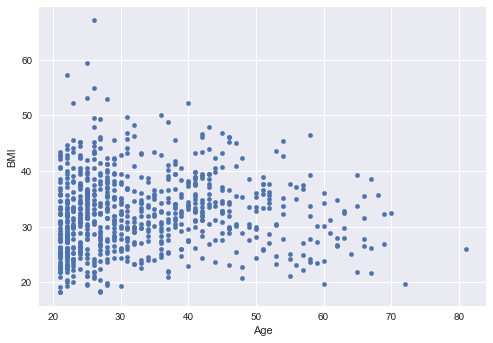

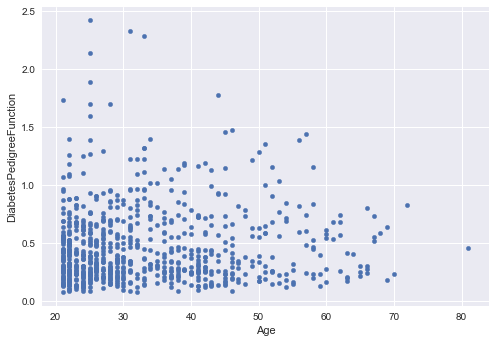

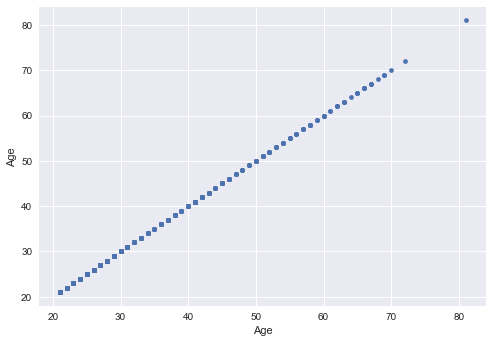

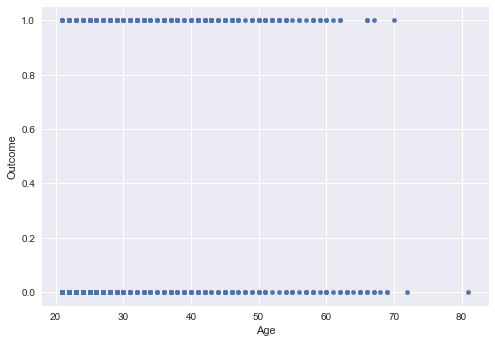

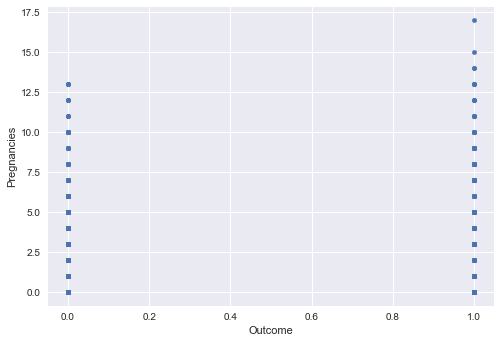

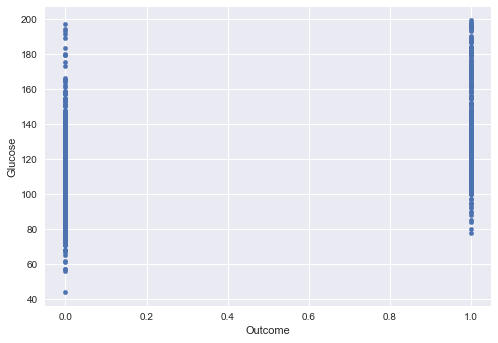

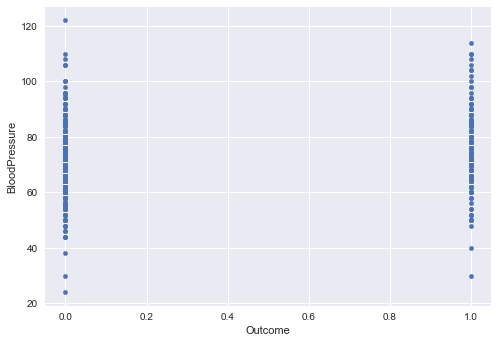

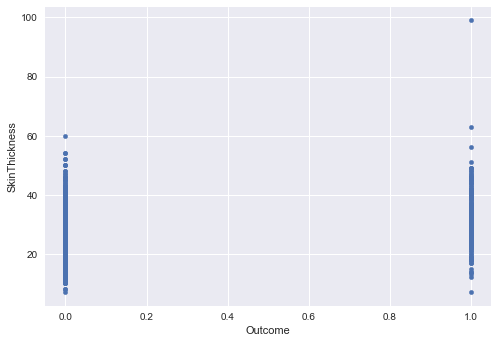

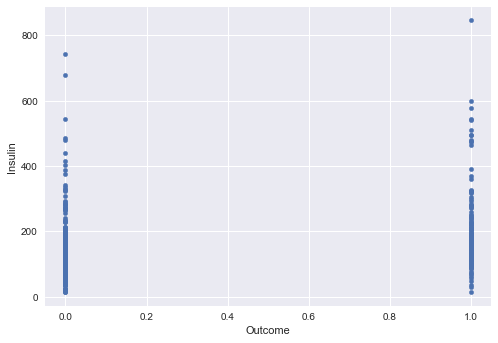

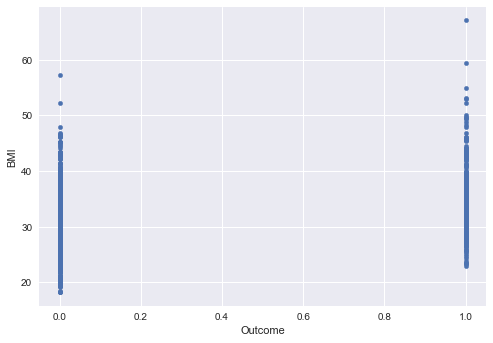

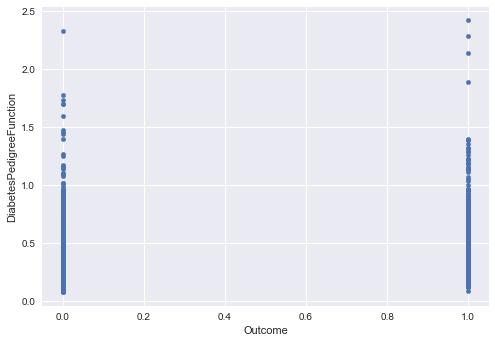

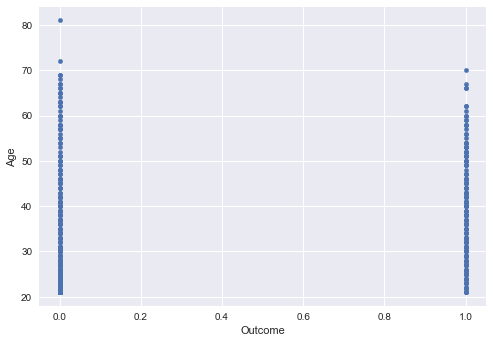

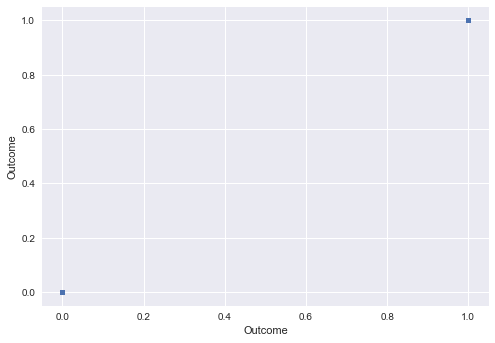

In [19]:
for i in train.columns:
    for j in train.columns:
        train.plot.scatter(x=i, y=j)

### FINDINGS :
#### After going through the above scatter plot between different variables we get to see the relationship between them, as in between Blood Pressure and Glucose we can see both are in direct relationship, increase of one leads to increase in value of other. the same scenerio is in between Insulin-Glucose, BMI-Glucose, Blood Pressure-BMI, Glucose-Diabetes Pedigree Function, Age-BMI.

### Correlation Analysis:

In [20]:
train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


### Exploring correlation using Heat Map

<AxesSubplot:>

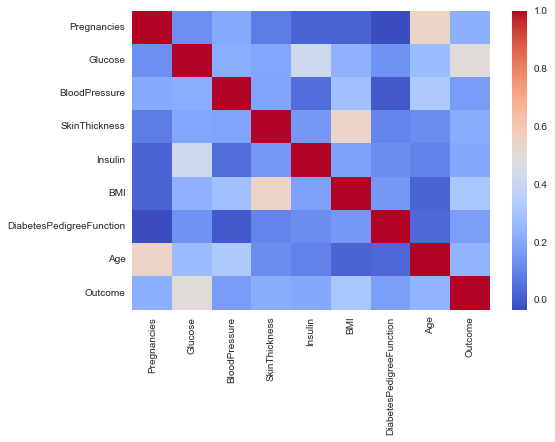

In [21]:
sns.heatmap(train.corr(), cmap= 'coolwarm')

### MODEL B|UILDING:

### After going through the data it is clear that this is a Classifcation problem. So we will try Classification Models on the data and check the Accuracy and ROC-Scores of different models and select the model with best accuracy and ROC-Scores.

### Splitting the data for Model Building

In [22]:
train_x,test_x,train_y,test_y = train_test_split(train.iloc[:,:-1],train.iloc[:,-1],random_state=151 )

### Logistic Regression

In [23]:
lr= LogisticRegression()

In [24]:
lr.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
lr_pred = lr.predict(test_x)

In [26]:
lr_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
test_y.to_xarray

<bound method NDFrame.to_xarray of 767    0
105    0
395    0
603    1
604    1
      ..
531    0
9      1
463    0
181    0
483    0
Name: Outcome, Length: 192, dtype: int64>

In [28]:
accuracy_score(test_y, lr_pred)

0.7604166666666666

### Decision Tree

In [29]:
dt= DecisionTreeClassifier()

Using the default Parameters for these models

In [30]:
dt.fit(train_x, train_y)

DecisionTreeClassifier()

In [31]:
dt_pred=dt.predict(test_x)

In [32]:
accuracy_score(test_y,dt_pred)

0.7291666666666666

### Random Forest

In [33]:
rf= RandomForestClassifier(random_state=22,n_jobs=-1 )

Going for GridSearch cross validation method to choose the best value of the parameters 

In [34]:
params={
    'max_depth': [5,6,7,8,9,10,11,12,15],
    'n_estimators': [10,12,14,15,16,18,20,25,30,40,60],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10,12,18]
 }

In [35]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [36]:
grid_search.fit(train_x, train_y)

Fitting 4 folds for each of 1089 candidates, totalling 4356 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=22),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 15],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12,
                                              18],
                         'n_estimators': [10, 12, 14, 15, 16, 18, 20, 25, 30,
                                          40, 60]},
             scoring='accuracy', verbose=1)

In [37]:
best_est_cv = grid_search.best_estimator_
best_est_cv

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=20,
                       n_jobs=-1, random_state=22)

In [38]:
best_est_cv.feature_importances_

array([0.08786094, 0.28992464, 0.06630693, 0.06437992, 0.07686726,
       0.16963232, 0.11936474, 0.12566325])

In [39]:
df_est=pd.DataFrame({"features": train_x.columns, "importance":best_est_cv.feature_importances_})
df_est.sort_values(by="importance", ascending= False)

,features,importance
1,Glucose,0.289925
5,BMI,0.169632
7,Age,0.125663
6,DiabetesPedigreeFunction,0.119365
0,Pregnancies,0.087861
4,Insulin,0.076867
2,BloodPressure,0.066307
3,SkinThickness,0.064380


In [40]:
best_est_cv.fit(train_x,train_y)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=20,
                       n_jobs=-1, random_state=22)

In [41]:
rf_pred=best_est_cv.predict(test_x)

In [42]:
accuracy_score(test_y,rf_pred)

0.8229166666666666

### Naive Bayes

In [43]:
nb= GaussianNB()

In [44]:
nb.fit(train_x,train_y)

GaussianNB()

In [45]:
nb_pred= nb.predict(test_x)

In [46]:
accuracy_score(test_y,nb_pred)

0.7552083333333334

### SVM

#### Although this ML method is effective for high dimensional space, but it will be functional for low dimension as well. 

In [47]:
sv_model = svm.SVC()

In [48]:
sv_model.fit(train_x, train_y)

SVC()

In [49]:
svm_pred= sv_model.predict(test_x)

In [50]:
accuracy_score(test_y, svm_pred)

0.7447916666666666

### KNN

In [51]:
knn= KNeighborsClassifier()

In [52]:
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [53]:
knn_pred= knn.predict(test_x)

In [54]:
accuracy_score(test_y,knn_pred)

0.6875

#### KNN with grid search

In [55]:
knn_grid_search = GridSearchCV(estimator=knn,
                           param_grid={'n_neighbors': [9,10,11,12,14,20,25,30,35,40,45,50,55,60]},
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [56]:
knn_grid_search.fit(train_x,train_y)

Fitting 4 folds for each of 14 candidates, totalling 56 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [9, 10, 11, 12, 14, 20, 25, 30, 35, 40,
                                         45, 50, 55, 60]},
             scoring='accuracy', verbose=1)

In [57]:
knn_grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=20)

Here as well we are using grid search to chosse the best value of parameter for good accuracy

In [58]:
knn_best_pred= knn_grid_search.predict(test_x)

In [59]:
accuracy_score(test_y,knn_best_pred)

0.7447916666666666

#### Using Elbow-Curve method in KNN-model to find the best value of nearest neighbours to be choosed. 

In [60]:
error= []

In [61]:
for i in range(1,40):
    knn1= KNeighborsClassifier(n_neighbors=i)
    knn1.fit(train_x,train_y)
    knn1_pred= knn1.predict(test_x)
    error.append(np.mean(knn1_pred != test_y))

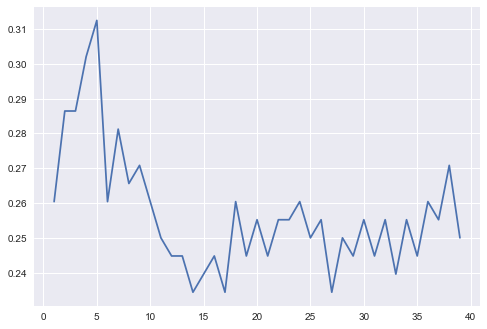

In [62]:
plt.plot(range(1,40),error)

so it is clear from above plotted elbow curve, the best n-neighbour value = 14

In [63]:
knn2= KNeighborsClassifier(n_neighbors=14)
knn2.fit(train_x,train_y)
knn2_pred= knn2.predict(test_x)

In [64]:
accuracy_score(test_y, knn2_pred)

0.765625

In [65]:
print(confusion_matrix(test_y,knn2_pred))

[[108   8]
 [ 37  39]]


In [66]:
print(classification_report( test_y, knn2_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83       116
           1       0.83      0.51      0.63        76

    accuracy                           0.77       192
   macro avg       0.79      0.72      0.73       192
weighted avg       0.78      0.77      0.75       192



### ROC-CURVE

In [67]:
random_probs = [0 for i in range(len(test_y))]
fpr, tpr, _ = roc_curve(test_y, random_probs, pos_label=1)
fpr_knn,tpr_knn, thr_knn = roc_curve(test_y,knn2_pred )
fpr_svm,tpr_svm, thr_svm = roc_curve(test_y,svm_pred )
fpr_nb, tpr_nb, thr_nb= roc_curve(test_y, nb_pred)
fpr_lr, tpr_lr, thr_lr= roc_curve(test_y, lr_pred)
fpr_rf, tpr_rf, thr_rf= roc_curve(test_y, rf_pred)
fpr_dt, tpr_dt, thr_dt= roc_curve(test_y, dt_pred)

Text(0.5, 1.0, 'ROC-Curve')

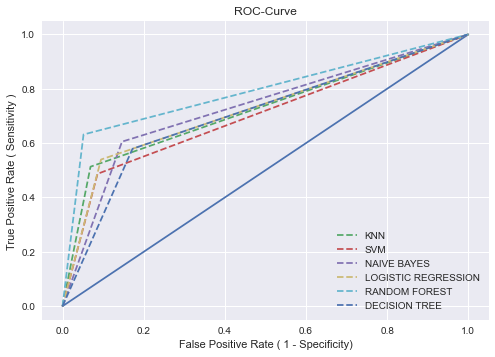

In [68]:
plt.plot(fpr, tpr)
plt.plot(fpr_knn, tpr_knn, linestyle='--', label='KNN' )
plt.plot(fpr_svm, tpr_svm, linestyle='--', label='SVM')
plt.plot(fpr_nb, tpr_nb, linestyle='--', label='NAIVE BAYES')
plt.plot(fpr_lr, tpr_lr, linestyle='--', label='LOGISTIC REGRESSION')
plt.plot(fpr_rf, tpr_rf, linestyle='--', label='RANDOM FOREST')
plt.plot(fpr_dt, tpr_dt, linestyle='--', label= 'DECISION TREE')
plt.legend(loc= 'lower right')
plt.xlabel('False Positive Rate ( 1 - Specificity)')
plt.ylabel('True Positive Rate ( Sensitivity ) ')
plt.title('ROC-Curve')

### ROC-Score

In [69]:
pred_list= [lr_pred,rf_pred,dt_pred,knn2_pred,svm_pred,nb_pred]
ROC_Score=[]
for i in pred_list:
    ROC_Score.append(roc_auc_score(test_y,i))


In [70]:
model_list=["Logistic Regression","Random Forest", "Decision Tree", "K-Nearest Neighbour", "SVM", "Naive Bayes"]
roc_df = pd.DataFrame(zip(model_list, ROC_Score), columns=("MODEL NAME", "ROC Score"))
roc_df

,MODEL NAME,ROC Score
0,Logistic Regression,0.722323
1,Random Forest,0.789927
2,Decision Tree,0.703267
3,K-Nearest Neighbour,0.722096
4,SVM,0.700318
5,Naive Bayes,0.729356


### Classification Report

In [139]:
pred_list= [lr_pred,rf_pred,dt_pred,knn2_pred,svm_pred,nb_pred]
fpr_s = [fpr_lr[1] ,fpr_rf[1] ,fpr_dt[1], fpr_knn[1], fpr_svm[1], fpr_nb[1]]

In [140]:
print( "                  CLASSIFICATION REPORT",'\n')
for i in range(0, len(pred_list)):
    print(i+1,'.',model_list[i], " :",'\n')
    print(classification_report(test_y, pred_list[i]))
    print("Specificity: ",1- fpr_s[i])
    print("ROC-Score : ",roc_auc_score(test_y,pred_list[i]),'\n\n')

                  CLASSIFICATION REPORT 

1 . Logistic Regression  : 

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       116
           1       0.79      0.54      0.64        76

    accuracy                           0.76       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.76      0.75       192

Specificity:  0.9051724137931034
ROC-Score :  0.7223230490018149 


2 . Random Forest  : 

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       116
           1       0.89      0.63      0.74        76

    accuracy                           0.82       192
   macro avg       0.84      0.79      0.80       192
weighted avg       0.83      0.82      0.82       192

Specificity:  0.9482758620689655
ROC-Score :  0.7899274047186933 


3 . Decision Tree  : 

              precision    recall  f1-score   support

           0       0.75      0.83     

   ### So it is clear from the above classification report of different models on this dataset that Random Forest gave the best Accurcy Score and best ROC-Score, that means "Random forest" will give the best result in comparison to others including KNN-Model for this dataset in order to get best accuracy as well as in order to get best defined boundary for each class of target variable of the model. Also it gives best specificity, which means very less amount of patients are predicted wrongly about their health i.e. diabetic or non-diabetic.